In [2]:
%matplotlib inline
# from ggplot import *
from plotnine import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# LaTeX fonts for matplotlib
# import matplotlib
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['cmr10']})
rc('text', usetex = True)
# rc('text.latex', preamble = r'\usepackage{cmbright}')
# rc('text.latex', preamble = r'\usepackage{unicode-math}') # Requires XeTeX
# rc('text.latex', preamble = r'\setmathfont{cmr10}')
# latex = {
#     "text.usetex": True,
#     "font.family": "serif",
#     "font.serif": "Computer Modern Roman",
#     "axes.labelsize": 10,
#     "font.size": 10,
#     "legend.fontsize": 8,
#     "xtick.labelsize": 8,
#     "ytick.labelsize": 8,
#     "text.latex.unicode": True
# }
# matplotlib.rcParams.update(latex)

In [3]:
# Just in case it's needed, this is the CP2K header list
cp2kheaderlist = ["Filename", "A", "B", "C", "Alpha", "Beta", "Gamma", "CellVol"]

In [4]:
# Grab data from CSV files
nat_cp2k = pd.read_csv("nat_cp2k_mincellvol.ssv", sep = '\s+', header = None)
nat_cp2k.columns = cp2kheaderlist
nat_gulp = pd.read_csv("nat_gulp_props.ssv", sep = '\s+', header = 0)

In [5]:
nat_cp2k

Filename       A       B       C  Alpha   Beta  Gamma  \
0       nat00-final.pdb  18.640  18.990  13.293  90.00  90.00  90.00   
1    nat00_N5-final.pdb  18.462  18.842  13.329  90.10  90.09  89.99   
2   nat01_N10-final.pdb  18.422  18.824  13.341  89.83  89.93  90.00   
3    nat02_N0-final.pdb  18.374  18.833  13.310  89.97  89.95  89.78   
4   nat03_N12-final.pdb  18.333  18.809  13.319  90.15  89.75  89.79   
5    nat04_N7-final.pdb  18.337  18.861  13.283  90.02  90.05  89.99   
6    nat05_N0-final.pdb  18.262  18.829  13.284  90.22  90.14  89.97   
7    nat06_N7-final.pdb  18.128  18.809  13.258  90.14  89.97  89.79   
8    nat07_N4-final.pdb  17.964  18.675  13.276  90.31  89.84  89.77   
9    nat08_N0-final.pdb  17.791  18.648  13.249  90.39  89.96  90.00   
10   nat09_N2-final.pdb  17.756  18.640  13.267  90.29  89.93  89.99   
11   nat10_N0-final.pdb  17.652  18.577  13.226  90.17  89.93  89.80   
12   nat11_N3-final.pdb  17.634  18.578  13.244  90.15  89.71  89.81   
13   nat12_N2-final.pdb  17.433  18.473  13.192  90.00  89.92  89.58   
14   nat13_N1-final.pdb  17.440  18.445  13.211  90.00  89.82  89.57   
15   nat14_N1-final.pdb  17.240  18.386  13.161  90.06  89.97  89.77   
16   nat15_N0-final.pdb  17.110  18.396  13.154  89.81  90.25  89.92   

        CellVol  
0   2352.685532  
1   2318.313236  
2   2313.155585  
3   2302.861677  
4   2296.319481  
5   2296.989334  
6   2283.862269  
7   2260.264910  
8   2226.841617  
9   2197.736180  
10  2195.471904  
11  2168.518519  
12  2169.349435  
13  2124.115439  
14  2124.792198  
15  2085.833378  
16  2070.114170

In [6]:
nat_gulp

Filename Opt       Energy    Gnorm          A          B         C  \
0       nat00.gout   Y -4769.147481  0.00006  18.509408  18.888723  6.562699   
1    nat00_N0.gout   Y -4759.010022  0.00004  18.484742  18.878167  6.566820   
2    nat01_N4.gout   Y -4749.080531  0.00004  18.422299  18.867094  6.558971   
3   nat02_N10.gout   Y -4738.976565  0.00005  18.400163  18.855272  6.562358   
4    nat03_N7.gout   Y -4729.057038  0.00011  18.314905  18.845166  6.556515   
5    nat04_N3.gout   Y -4718.985044  0.00005  18.279059  18.835416  6.559783   
6    nat05_N0.gout   Y -4709.161079  0.00004  18.161136  18.817287  6.552586   
7    nat06_N7.gout   Y -4699.123748  0.00005  18.117580  18.807784  6.555910   
8    nat07_N4.gout   Y -4689.352290  0.00004  17.960312  18.790106  6.549324   
9    nat08_N0.gout   Y -4679.276853  0.00072  17.936418  18.771448  6.552872   
10   nat09_N2.gout   Y -4669.391130  0.00004  17.836335  18.753492  6.547295   
11   nat10_N0.gout   Y -4659.354243  0.00005  17.793489  18.738579  6.550625   
12   nat11_N0.gout   Y -4649.579728  0.00004  17.665970  18.703812  6.543229   
13   nat12_N2.gout   Y -4639.517853  0.00014  17.625071  18.686776  6.548549   
14   nat13_N1.gout   Y -4629.756460  0.00005  17.488587  18.658661  6.544067   
15   nat14_N1.gout   Y -4619.834868  0.00004  17.298413  18.625954  6.541676   
16   nat15_N0.gout   Y -4610.130448  0.00005  17.249741  18.582358  6.542328   

        Alpha       Beta      Gamma          Vol   PV  
0   90.000000  90.000000  90.000000  2294.444791  0.0  
1   89.952628  89.893866  89.991322  2291.540051  0.0  
2   89.999972  90.000000  89.802032  2279.722516  0.0  
3   90.068460  89.874948  89.807136  2276.724993  0.0  
4   90.025104  90.013827  89.988009  2262.963930  0.0  
5   90.098136  90.148974  89.982105  2258.480810  0.0  
6   90.072596  90.003708  89.789268  2239.285499  0.0  
7   90.134433  89.847612  89.793525  2233.907852  0.0  
8   90.208763  89.999951  89.999880  2210.226274  0.0  
9   90.133337  89.851662  90.007322  2206.289668  0.0  
10  90.125214  90.001302  89.819547  2190.011838  0.0  
11  90.054238  89.836369  89.817494  2184.119321  0.0  
12  89.999934  89.999986  89.616949  2161.971876  0.0  
13  89.995147  89.861281  89.624442  2156.749514  0.0  
14  90.000011  89.999930  89.787803  2135.403339  0.0  
15  89.784616  90.273218  89.989108  2107.685554  0.0  
16  89.999915  90.000121  90.000011  2097.083533  0.0

In [7]:
def get_fractionals(df, ref):
    """
    Return fractional values of a given data frame COLUMN based on a specific reference value;
    specific to the two data frames being used in this notebook!
    """
    newdf = df / ref
    return newdf

def get_deltas(gulp, cp2k):
    """
    Return differences between consecutive values in a given data frame COLUMN;
    specific to the two data frames being used in this notebook!
    """
    delta_vol = gulp['Vol'] - cp2k[7]
    print(delta_vol)

# newdf = np.diff(df)

## Make individual comparison-y dataframes

### Volume

In [8]:
gulp_vol_deltas = get_fractionals(nat_gulp['Vol'], nat_gulp['Vol'][0])
gulp_vol_deltas

0     1.000000
1     0.998734
2     0.993584
3     0.992277
4     0.986280
5     0.984326
6     0.975960
7     0.973616
8     0.963295
9     0.961579
10    0.954484
11    0.951916
12    0.942264
13    0.939988
14    0.930684
15    0.918604
16    0.913983
Name: Vol, dtype: float64

In [9]:
cp2k_vol_deltas = get_fractionals(nat_cp2k['CellVol'], nat_gulp['Vol'][0])
cp2k_vol_deltas

0     1.025383
1     1.010403
2     1.008155
3     1.003668
4     1.000817
5     1.001109
6     0.995388
7     0.985103
8     0.970536
9     0.957851
10    0.956864
11    0.945117
12    0.945479
13    0.925764
14    0.926059
15    0.909080
16    0.902229
Name: CellVol, dtype: float64

In [11]:
# Create new data frame with dehydration step (i.e. index), n-th water lost, GULP volume, and CP2K volume
vols = pd.DataFrame({'Dehydration step': [i for i in range(0, 17)], 'GULP volume': gulp_vol_deltas, 'CP2K volume': cp2k_vol_deltas}, columns = ['Dehydration step', 'GULP volume', 'CP2K volume'])
vols

Dehydration step  GULP volume  CP2K volume
0                  0     1.000000     1.025383
1                  1     0.998734     1.010403
2                  2     0.993584     1.008155
3                  3     0.992277     1.003668
4                  4     0.986280     1.000817
5                  5     0.984326     1.001109
6                  6     0.975960     0.995388
7                  7     0.973616     0.985103
8                  8     0.963295     0.970536
9                  9     0.961579     0.957851
10                10     0.954484     0.956864
11                11     0.951916     0.945117
12                12     0.942264     0.945479
13                13     0.939988     0.925764
14                14     0.930684     0.926059
15                15     0.918604     0.909080
16                16     0.913983     0.902229

In [12]:
# get_deltas(nat_gulp, nat_cp2k)

### Energy deltas

Can't do energy as yet, because haven't pulled in the CP2K energies (in a separate CSV file to the other properties).

In [13]:
# gulp_ene_deltas = get_fractionals(nat_gulp['Energy'], nat_gulp['Energy'][0])
# cp2k_ene_deltas = get_fractionals(nat_cp2k['MISSING'], nat_gulp['Energy'][0])
# ene = pd.DataFrame({'Dehydration step': [i for i in range(0, 17)], 'GULP volume': gulp_vol_deltas, 'CP2K volume': cp2k_vol_deltas}, columns = ['Dehydration step', 'GULP volume', 'CP2K volume'])
# ene

### a deltas

In [14]:
gulp_a_deltas = get_fractionals(nat_gulp['A'], nat_gulp['A'][0])
cp2k_a_deltas = get_fractionals(nat_cp2k['A'], nat_gulp['A'][0])
a = pd.DataFrame({'Dehydration step': [i for i in range(0, 17)], 'GULP a': gulp_a_deltas, 'CP2K a': cp2k_a_deltas}, columns = ['Dehydration step', 'GULP a', 'CP2K a'])
a

Dehydration step    GULP a    CP2K a
0                  0  1.000000  1.007055
1                  1  0.998667  0.997439
2                  2  0.995294  0.995278
3                  3  0.994098  0.992684
4                  4  0.989492  0.990469
5                  5  0.987555  0.990685
6                  6  0.981184  0.986633
7                  7  0.978831  0.979394
8                  8  0.970334  0.970533
9                  9  0.969043  0.961187
10                10  0.963636  0.959296
11                11  0.961321  0.953677
12                12  0.954432  0.952705
13                13  0.952222  0.941845
14                14  0.944849  0.942224
15                15  0.934574  0.931418
16                16  0.931945  0.924395

### b deltas

In [15]:
gulp_b_deltas = get_fractionals(nat_gulp['B'], nat_gulp['B'][0])
cp2k_b_deltas = get_fractionals(nat_cp2k['B'], nat_gulp['B'][0])
b = pd.DataFrame({'Dehydration step': [i for i in range(0, 17)], 'GULP b': gulp_b_deltas, 'CP2K b': cp2k_b_deltas}, columns = ['Dehydration step', 'GULP b', 'CP2K b'])
b

Dehydration step    GULP b    CP2K b
0                  0  1.000000  1.005362
1                  1  0.999441  0.997526
2                  2  0.998855  0.996573
3                  3  0.998229  0.997050
4                  4  0.997694  0.995779
5                  5  0.997178  0.998532
6                  6  0.996218  0.996838
7                  7  0.995715  0.995779
8                  8  0.994779  0.988685
9                  9  0.993791  0.987256
10                10  0.992841  0.986832
11                11  0.992051  0.983497
12                12  0.990211  0.983550
13                13  0.989309  0.977991
14                14  0.987820  0.976509
15                15  0.986089  0.973385
16                16  0.983781  0.973914

### c deltas

In [16]:
gulp_c_deltas = get_fractionals(nat_gulp['C'], nat_gulp['C'][0])
cp2k_c_deltas = get_fractionals(nat_cp2k['C'], nat_gulp['C'][0] * 2)
c = pd.DataFrame({'Dehydration step': [i for i in range(0, 17)], 'GULP c': gulp_c_deltas, 'CP2K c': cp2k_c_deltas}, columns = ['Dehydration step', 'GULP c', 'CP2K c'])
c

Dehydration step    GULP c    CP2K c
0                  0  1.000000  1.012769
1                  1  1.000628  1.015512
2                  2  0.999432  1.016426
3                  3  0.999948  1.014064
4                  4  0.999058  1.014750
5                  5  0.999556  1.012007
6                  6  0.998459  1.012084
7                  7  0.998966  1.010103
8                  8  0.997962  1.011474
9                  9  0.998503  1.009417
10                10  0.997653  1.010788
11                11  0.998160  1.007665
12                12  0.997033  1.009036
13                13  0.997844  1.005074
14                14  0.997161  1.006522
15                15  0.996797  1.002712
16                16  0.996896  1.002179

### alpha deltas

In [17]:
gulp_alpha_deltas = get_fractionals(nat_gulp['Alpha'], nat_gulp['Alpha'][0])
cp2k_alpha_deltas = get_fractionals(nat_cp2k['Alpha'], nat_gulp['Alpha'][0])
alpha = pd.DataFrame({'Dehydration step': [i for i in range(0, 17)], 'GULP alpha': gulp_alpha_deltas, 'CP2K alpha': cp2k_alpha_deltas}, columns = ['Dehydration step', 'GULP alpha', 'CP2K alpha'])
alpha

Dehydration step  GULP alpha  CP2K alpha
0                  0    1.000000    1.000000
1                  1    0.999474    1.001111
2                  2    1.000000    0.998111
3                  3    1.000761    0.999667
4                  4    1.000279    1.001667
5                  5    1.001090    1.000222
6                  6    1.000807    1.002444
7                  7    1.001494    1.001556
8                  8    1.002320    1.003444
9                  9    1.001482    1.004333
10                10    1.001391    1.003222
11                11    1.000603    1.001889
12                12    0.999999    1.001667
13                13    0.999946    1.000000
14                14    1.000000    1.000000
15                15    0.997607    1.000667
16                16    0.999999    0.997889

### beta deltas

In [18]:
gulp_beta_deltas = get_fractionals(nat_gulp['Beta'], nat_gulp['Beta'][0])
cp2k_beta_deltas = get_fractionals(nat_cp2k['Beta'], nat_gulp['Beta'][0])
beta = pd.DataFrame({'Dehydration step': [i for i in range(0, 17)], 'GULP beta': gulp_beta_deltas, 'CP2K beta': cp2k_beta_deltas}, columns = ['Dehydration step', 'GULP beta', 'CP2K beta'])
beta

Dehydration step  GULP beta  CP2K beta
0                  0   1.000000   1.000000
1                  1   0.998821   1.001000
2                  2   1.000000   0.999222
3                  3   0.998611   0.999444
4                  4   1.000154   0.997222
5                  5   1.001655   1.000556
6                  6   1.000041   1.001556
7                  7   0.998307   0.999667
8                  8   0.999999   0.998222
9                  9   0.998352   0.999556
10                10   1.000014   0.999222
11                11   0.998182   0.999222
12                12   1.000000   0.996778
13                13   0.998459   0.999111
14                14   0.999999   0.998000
15                15   1.003036   0.999667
16                16   1.000001   1.002778

### gamma deltas

In [19]:
gulp_gamma_deltas = get_fractionals(nat_gulp['Gamma'], nat_gulp['Gamma'][0])
cp2k_gamma_deltas = get_fractionals(nat_cp2k['Gamma'], nat_gulp['Gamma'][0])
gamma = pd.DataFrame({'Dehydration step': [i for i in range(0, 17)], 'GULP gamma': gulp_gamma_deltas, 'CP2K gamma': cp2k_gamma_deltas}, columns = ['Dehydration step', 'GULP gamma', 'CP2K gamma'])
gamma

Dehydration step  GULP gamma  CP2K gamma
0                  0    1.000000    1.000000
1                  1    0.999904    0.999889
2                  2    0.997800    1.000000
3                  3    0.997857    0.997556
4                  4    0.999867    0.997667
5                  5    0.999801    0.999889
6                  6    0.997659    0.999667
7                  7    0.997706    0.997667
8                  8    0.999999    0.997444
9                  9    1.000081    1.000000
10                10    0.997995    0.999889
11                11    0.997972    0.997778
12                12    0.995744    0.997889
13                13    0.995827    0.995333
14                14    0.997642    0.995222
15                15    0.999879    0.997444
16                16    1.000000    0.999111

## Making `matplotlib.pyplot` plots

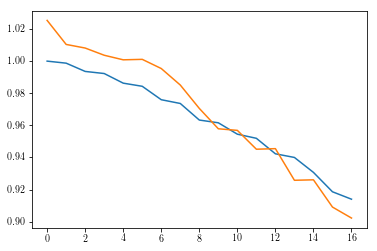

In [20]:
gulp_vol_deltas.plot()
cp2k_vol_deltas.plot()

# The following save commands must be in the same cell as the actual plot or else it'll save as blank!
plt.savefig('VolDiffs.png')
plt.savefig('VolDiffs.pdf')
plt.savefig('VolDiffs.svg')

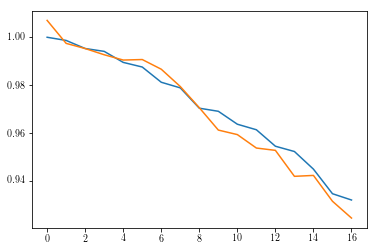

In [21]:
gulp_a_deltas.plot()
cp2k_a_deltas.plot()

# The following save commands must be in the same cell as the actual plot or else it'll save as blank!
plt.savefig('aDiffs.png')
plt.savefig('aDiffs.pdf')
plt.savefig('aDiffs.svg')

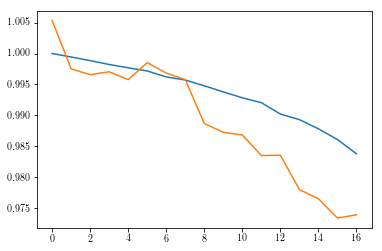

In [22]:
gulp_b_deltas.plot()
cp2k_b_deltas.plot()

# The following save commands must be in the same cell as the actual plot or else it'll save as blank!
plt.savefig('bDiffs.png')
plt.savefig('bDiffs.pdf')
plt.savefig('bDiffs.svg')

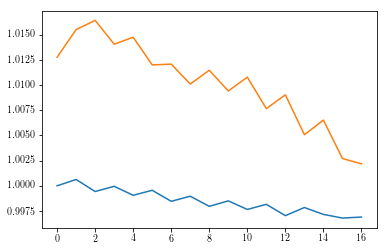

In [23]:
gulp_c_deltas.plot()
cp2k_c_deltas.plot()

# The following save commands must be in the same cell as the actual plot or else it'll save as blank!
plt.savefig('cDiffs.png')
plt.savefig('cDiffs.pdf')
plt.savefig('cDiffs.svg')

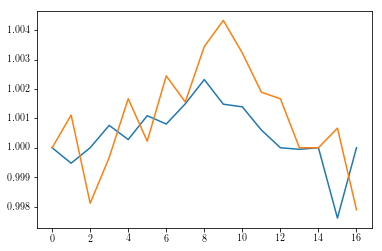

In [24]:
gulp_alpha_deltas.plot()
cp2k_alpha_deltas.plot()

# The following save commands must be in the same cell as the actual plot or else it'll save as blank!
plt.savefig('AlphaDiffs.png')
plt.savefig('AlphaDiffs.pdf')
plt.savefig('AlphaDiffs.svg')

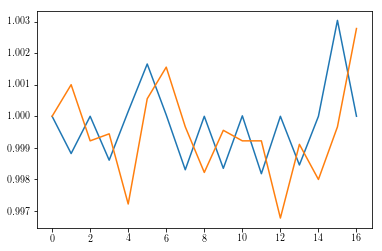

In [25]:
gulp_beta_deltas.plot()
cp2k_beta_deltas.plot()

# The following save commands must be in the same cell as the actual plot or else it'll save as blank!
plt.savefig('BetaDiffs.png')
plt.savefig('BetaDiffs.pdf')
plt.savefig('BetaDiffs.svg')

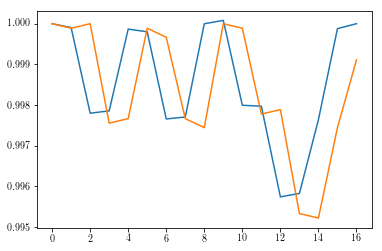

In [26]:
gulp_gamma_deltas.plot()
cp2k_gamma_deltas.plot()

# The following save commands must be in the same cell as the actual plot or else it'll save as blank!
plt.savefig('GammaDiffs.png')
plt.savefig('GammaDiffs.pdf')
plt.savefig('GammaDiffs.svg')

## Trying the same with `ggplot` (from `plotline` implementation)

In [27]:
font = 'cmr10'

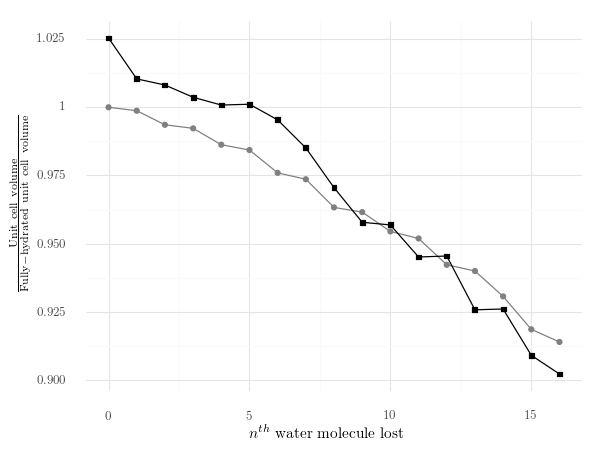

<ggplot: (-9223363306810751032)>

In [28]:
volcomp = ggplot(vols, aes(x = 'n-th water molecule lost', y = 'Volume')) \
    + geom_point(aes(x = 'Dehydration step', y = 'GULP volume'), color = 'grey', shape = 'o') \
    + geom_line(aes(x = 'Dehydration step', y = 'GULP volume'), color = 'grey') \
    + geom_point(aes(x = 'Dehydration step', y = 'CP2K volume'), color = 'black', shape = 's') \
    + geom_line(aes(x = 'Dehydration step', y = 'CP2K volume'), color = 'black') \
    + theme_minimal() \
    + theme(text = element_text(family = font)) \
    + xlab("$n^{{th}}$ water molecule lost") \
    + ylab("$\\frac{{\\mathrm{Unit~cell~volume}}}{{\\mathrm{{Fully-hydrated~unit~cell~volume}}}}$")
volcomp

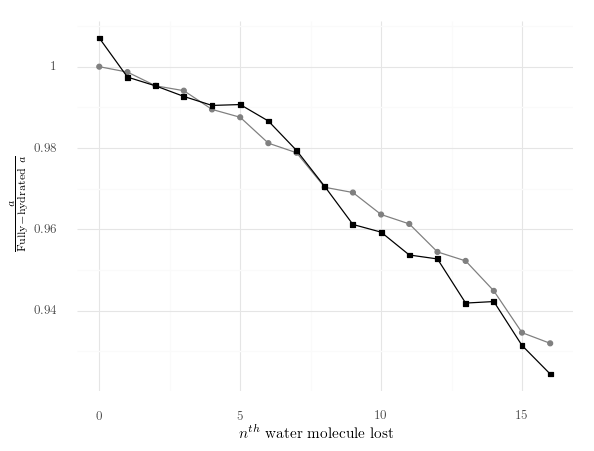

<ggplot: (-9223363306810750134)>

In [29]:
acomp = ggplot(a, aes(x = 'n-th water molecule lost', y = 'a')) \
    + geom_point(aes(x = 'Dehydration step', y = 'GULP a'), color = 'grey', shape = 'o') \
    + geom_line(aes(x = 'Dehydration step', y = 'GULP a'), color = 'grey') \
    + geom_point(aes(x = 'Dehydration step', y = 'CP2K a'), color = 'black', shape = 's') \
    + geom_line(aes(x = 'Dehydration step', y = 'CP2K a'), color = 'black') \
    + theme_minimal() \
    + theme(text = element_text(family = font)) \
    + xlab("$n^{{th}}$ water molecule lost") \
    + ylab("$\\frac{{a}}{{\\mathrm{{Fully-hydrated}}~a}}$")
acomp

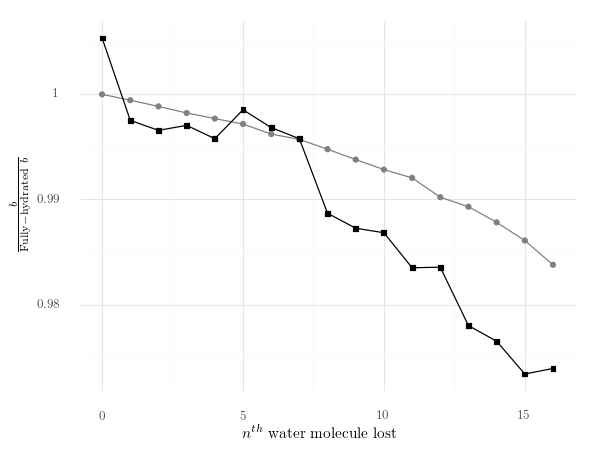

<ggplot: (-9223363306810462404)>

In [30]:
bcomp = ggplot(b, aes(x = 'n-th water molecule lost', y = 'b')) \
    + geom_point(aes(x = 'Dehydration step', y = 'GULP b'), color = 'grey', shape = 'o') \
    + geom_line(aes(x = 'Dehydration step', y = 'GULP b'), color = 'grey') \
    + geom_point(aes(x = 'Dehydration step', y = 'CP2K b'), color = 'black', shape = 's') \
    + geom_line(aes(x = 'Dehydration step', y = 'CP2K b'), color = 'black') \
    + theme_minimal() \
    + theme(text = element_text(family = font)) \
    + xlab("$n^{{th}}$ water molecule lost") \
    + ylab("$\\frac{{b}}{{\\mathrm{{Fully-hydrated}}~b}}$")
bcomp

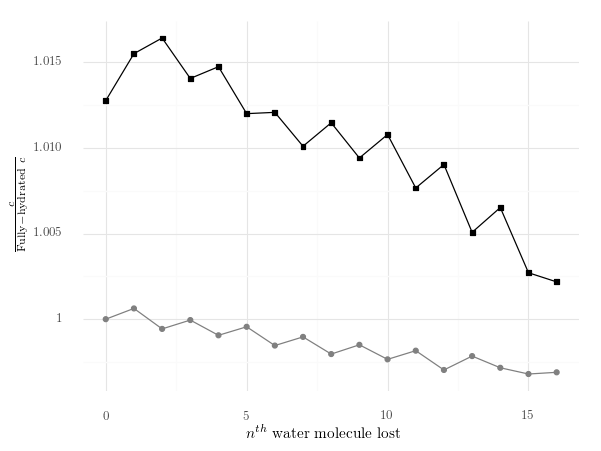

<ggplot: (-9223363306810081711)>

In [31]:
ccomp = ggplot(c, aes(x = 'n-th water molecule lost', y = 'c')) \
    + geom_point(aes(x = 'Dehydration step', y = 'GULP c'), color = 'grey', shape = 'o') \
    + geom_line(aes(x = 'Dehydration step', y = 'GULP c'), color = 'grey') \
    + geom_point(aes(x = 'Dehydration step', y = 'CP2K c'), color = 'black', shape = 's') \
    + geom_line(aes(x = 'Dehydration step', y = 'CP2K c'), color = 'black') \
    + theme_minimal() \
    + theme(text = element_text(family = font)) \
    + xlab("$n^{{th}}$ water molecule lost") \
    + ylab("$\\frac{{c}}{{\\mathrm{{Fully-hydrated}}~c}}$")
ccomp

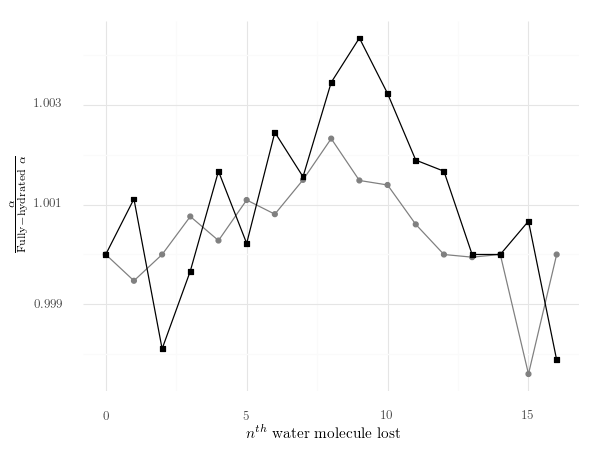

<ggplot: (8730044995511)>

In [32]:
alphacomp = ggplot(alpha, aes(x = 'n-th water molecule lost', y = 'alpha')) \
    + geom_point(aes(x = 'Dehydration step', y = 'GULP alpha'), color = 'grey', shape = 'o') \
    + geom_line(aes(x = 'Dehydration step', y = 'GULP alpha'), color = 'grey') \
    + geom_point(aes(x = 'Dehydration step', y = 'CP2K alpha'), color = 'black', shape = 's') \
    + geom_line(aes(x = 'Dehydration step', y = 'CP2K alpha'), color = 'black') \
    + theme_minimal() \
    + theme(text = element_text(family = font)) \
    + xlab("$n^{{th}}$ water molecule lost") \
    + ylab("$\\frac{{\\alpha}}{{\\mathrm{{Fully-hydrated}}~\\alpha}}$")
alphacomp

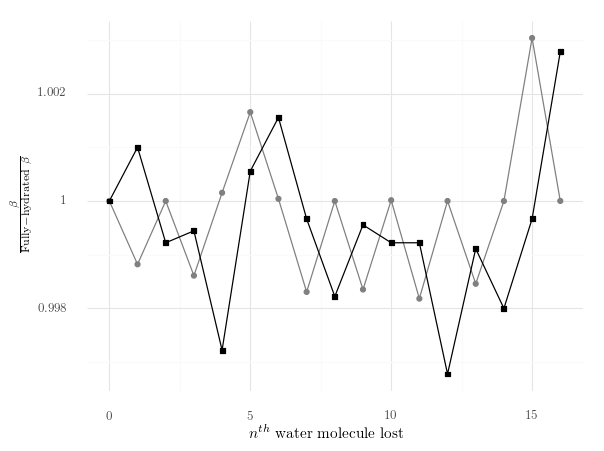

<ggplot: (-9223363306809810337)>

In [33]:
betacomp = ggplot(beta, aes(x = 'n-th water molecule lost', y = 'beta')) \
    + geom_point(aes(x = 'Dehydration step', y = 'GULP beta'), color = 'grey', shape = 'o') \
    + geom_line(aes(x = 'Dehydration step', y = 'GULP beta'), color = 'grey') \
    + geom_point(aes(x = 'Dehydration step', y = 'CP2K beta'), color = 'black', shape = 's') \
    + geom_line(aes(x = 'Dehydration step', y = 'CP2K beta'), color = 'black') \
    + theme_minimal() \
    + theme(text = element_text(family = font)) \
    + xlab("$n^{{th}}$ water molecule lost") \
    + ylab("$\\frac{{\\beta}}{{\\mathrm{{Fully-hydrated}}~\\beta}}$")
betacomp

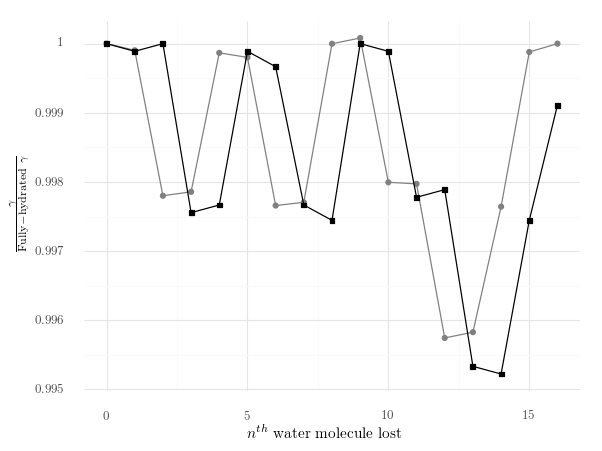

<ggplot: (-9223363306810733038)>

In [34]:
gammacomp = ggplot(gamma, aes(x = 'n-th water molecule lost', y = 'gamma')) \
    + geom_point(aes(x = 'Dehydration step', y = 'GULP gamma'), color = 'grey', shape = 'o') \
    + geom_line(aes(x = 'Dehydration step', y = 'GULP gamma'), color = 'grey') \
    + geom_point(aes(x = 'Dehydration step', y = 'CP2K gamma'), color = 'black', shape = 's') \
    + geom_line(aes(x = 'Dehydration step', y = 'CP2K gamma'), color = 'black') \
    + theme_minimal() \
    + theme(text = element_text(family = font)) \
    + xlab("$n^{{th}}$ water molecule lost") \
    + ylab("$\\frac{{\\gamma}}{{\\mathrm{{Fully-hydrated}}~\\gamma}}$")
gammacomp

### Save all the things

In [35]:
volcomp.save('ggVol.pdf', dpi = 600)
acomp.save('ggA.pdf', dpi = 600)
bcomp.save('ggB.pdf', dpi = 600)
ccomp.save('ggC.pdf', dpi = 600)
alphacomp.save('ggAlpha.pdf', dpi = 600)
betacomp.save('ggBeta.pdf', dpi = 600)
gammacomp.save('ggGamma.pdf', dpi = 600)

/home/james/anaconda3/lib/python3.6/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units))
/home/james/anaconda3/lib/python3.6/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: ggVol.pdf
  warn('Filename: {}'.format(filename))
/home/james/anaconda3/lib/python3.6/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units))
/home/james/anaconda3/lib/python3.6/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: ggA.pdf
  warn('Filename: {}'.format(filename))
/home/james/anaconda3/lib/python3.6/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units))
/home/james/anaconda3/lib/python3.6/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: ggB.pdf
  warn('Filename: {}'.format(filename))
/home/james/anaconda3/lib/python3.6/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 6.4 x 4.8 in 

## Make comparison-y plots between experimental metanatrolite phases $\alpha_{1}, \alpha_{2}$, and GULP and CP2K metanatrolite

In [34]:
mnat_gulp = [17.249741, 18.582358, 6.542328, 89.999915, 90.000121, 90.000011, 2097.083533]
mnat_cp2k = [17.110, 18.396, 13.154, 89.81, 90.25, 89.92, 2070.114170]
mnat_alpha1 = [16.177, 16.943, 6.4370, 90.0, 90.0, 89.685, 1764.3]
mnat_alpha2 = [17.576, 18.163, 6.3704, 90.0, 90.0, 90.0, 2033.7]

mnat = pd.DataFrame({'Parameter': ['$a$', '$b$', '$c$', '$\\alpha$', '$\\beta$', '$\\gamma$', 'Volume'], \
                     'Alpha1': mnat_alpha1, \
                     'Alpha2': mnat_alpha2, \
                     'GULP': mnat_gulp, \
                     'CP2K': mnat_cp2k}, \
                    columns = ['Parameter', 'Alpha1', 'Alpha2', 'GULP', 'CP2K'])
mnat

Parameter    Alpha1     Alpha2         GULP        CP2K
0       $a$    16.177    17.5760    17.249741    17.11000
1       $b$    16.943    18.1630    18.582358    18.39600
2       $c$     6.437     6.3704     6.542328    13.15400
3  $\alpha$    90.000    90.0000    89.999915    89.81000
4   $\beta$    90.000    90.0000    90.000121    90.25000
5  $\gamma$    89.685    90.0000    90.000011    89.92000
6    Volume  1764.300  2033.7000  2097.083533  2070.11417

In [35]:
# Just testing DataFrame.filter() - got there eventually!
mnat.filter(items = [0, 1, 2], axis = 0)

Parameter  Alpha1   Alpha2       GULP    CP2K
0       $a$  16.177  17.5760  17.249741  17.110
1       $b$  16.943  18.1630  18.582358  18.396
2       $c$   6.437   6.3704   6.542328  13.154

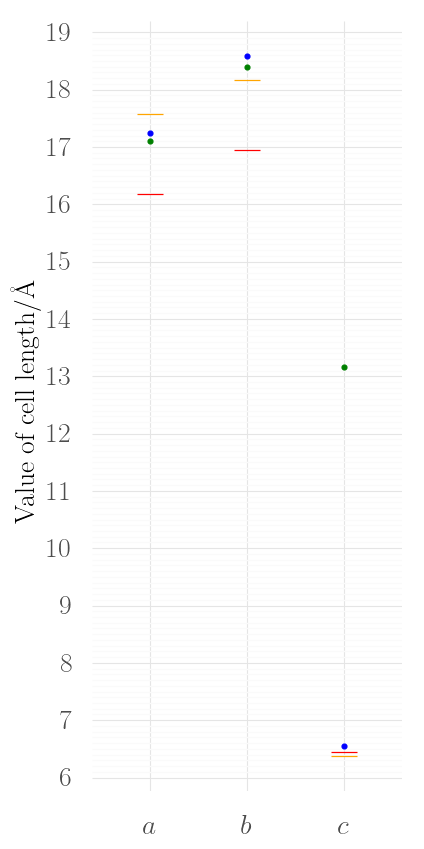

<ggplot: (7551348221)>

In [36]:
metacomp_abc = ggplot(mnat.filter(items = [0, 1, 2], axis = 0)) \
    + geom_point(aes(x = 'Parameter', y = 'Alpha1'), color = 'red', shape = '_', size = 10, show_legend = True) \
    + geom_point(aes(x = 'Parameter', y = 'Alpha2'), color = 'orange', shape = '_', size = 10, show_legend = True) \
    + geom_point(aes(x = 'Parameter', y = 'GULP'), color = 'blue', shape = 'o', show_legend = True) \
    + geom_point(aes(x = 'Parameter', y = 'CP2K'), color = 'green', shape = 'o', show_legend = True) \
    + theme_minimal() \
    + theme(figure_size = (4, 10), legend_position = 'right', text = element_text(size = 20)) \
    + scale_y_continuous(breaks = [i for i in range(5, 20)], minor_breaks = [i for i in np.linspace(6, 19, 131) if i % 1 != 0]) \
    + xlab("") \
    + ylab(u"Value of cell length/\\r{{A}}")
metacomp_abc

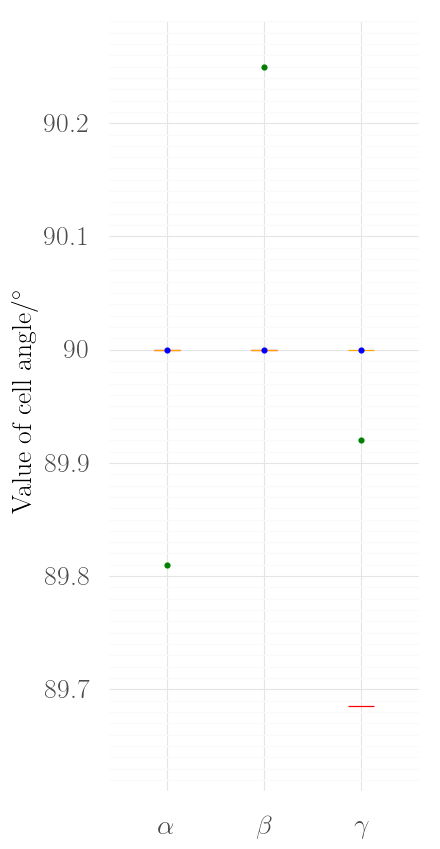

<ggplot: (-9223372029303209991)>

In [37]:
metacomp_alphabetagamma = ggplot(mnat.filter(items = [3, 4, 5], axis = 0)) \
    + geom_point(aes(x = 'Parameter', y = 'Alpha1'), color = 'red', shape = '_', size = 10, show_legend = True) \
    + geom_point(aes(x = 'Parameter', y = 'Alpha2'), color = 'orange', shape = '_', size = 10, show_legend = True) \
    + geom_point(aes(x = 'Parameter', y = 'GULP'), color = 'blue', shape = 'o', show_legend = True) \
    + geom_point(aes(x = 'Parameter', y = 'CP2K'), color = 'green', shape = 'o', show_legend = True) \
    + theme_minimal() \
    + theme(figure_size = (4, 10), legend_position = 'right', text = element_text(size = 20)) \
    + scale_y_continuous(breaks = [i for i in np.linspace(89.6, 90.3, 8)], minor_breaks = [i for i in np.arange(89.6, 90.3, 0.01) if '{:.3g}'.format(i) != '{:.4g}'.format(i)]) \
    + xlab("") \
    + ylab(u"Value of cell angle/$^{{\\circ}}$")
metacomp_alphabetagamma

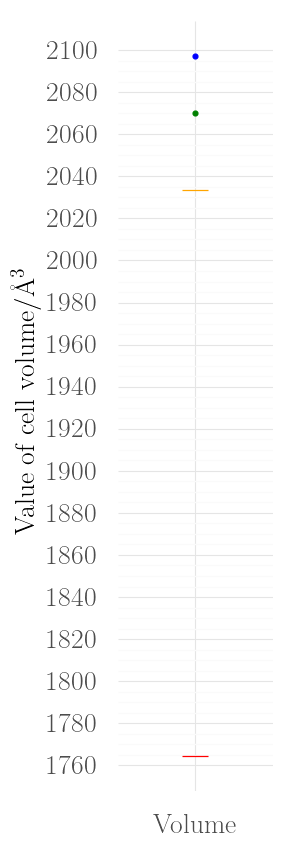

<ggplot: (-9223372029305999507)>

In [38]:
metacomp_vol = ggplot(mnat.filter(items = [6], axis = 0)) \
    + geom_point(aes(x = 'Parameter', y = 'Alpha1'), color = 'red', shape = '_', size = 10, show_legend = True) \
    + geom_point(aes(x = 'Parameter', y = 'Alpha2'), color = 'orange', shape = '_', size = 10, show_legend = True) \
    + geom_point(aes(x = 'Parameter', y = 'GULP'), color = 'blue', shape = 'o', show_legend = True) \
    + geom_point(aes(x = 'Parameter', y = 'CP2K'), color = 'green', shape = 'o', show_legend = True) \
    + theme_minimal() \
    + theme(figure_size = (2, 10), legend_position = 'right', text = element_text(size = 20)) \
    + scale_y_continuous(breaks = [i for i in np.linspace(1760, 2100, 18)], minor_breaks = [i for i in np.linspace(1760, 2100, 69) if i % 20 != 0]) \
    + xlab("") \
    + ylab("$\\mathrm{Value~of~cell~volume/\\r{{A}}^{{3}}}$")
metacomp_vol

### Save all the things again

In [39]:
metacomp_abc.save('ggMetaABC.pdf')
metacomp_alphabetagamma.save('ggMetaAlphaBetaGamma.pdf')
metacomp_vol.save('ggMetaVol.pdf')

/Users/jcprime/anaconda/envs/py3/lib/python3.6/site-packages/plotnine/ggplot.py:708: UserWarning: Saving 4 x 10 in image.
  from_inches(height, units), units))
/Users/jcprime/anaconda/envs/py3/lib/python3.6/site-packages/plotnine/ggplot.py:709: UserWarning: Filename: ggMetaABC.pdf
  warn('Filename: {}'.format(filename))
/Users/jcprime/anaconda/envs/py3/lib/python3.6/site-packages/plotnine/ggplot.py:708: UserWarning: Saving 4 x 10 in image.
  from_inches(height, units), units))
/Users/jcprime/anaconda/envs/py3/lib/python3.6/site-packages/plotnine/ggplot.py:709: UserWarning: Filename: ggMetaAlphaBetaGamma.pdf
  warn('Filename: {}'.format(filename))
/Users/jcprime/anaconda/envs/py3/lib/python3.6/site-packages/plotnine/ggplot.py:708: UserWarning: Saving 2 x 10 in image.
  from_inches(height, units), units))
/Users/jcprime/anaconda/envs/py3/lib/python3.6/site-packages/plotnine/ggplot.py:709: UserWarning: Filename: ggMetaVol.pdf
  warn('Filename: {}'.format(filename))


Some potentially-useful URLs to come back to, dropped in here purely to be able to close some extraneous tabs on Chrome before my computer explodes:

* [Align multiple ggplot2 graphs with a common x axis and different y axes, each with different y-axis labels](https://gist.github.com/tomhopper/faa24797bb44addeba79)
* [`rpy2` current stable version's documentation](https://rpy2.github.io/doc/v2.9.x/html/index.html)
* [Google search for "latex expressions in python plotnine"](https://www.google.co.uk/search?q=latex+expressions+in+python+plotnine)
* [Text rendering with LaTeX in `matplotlib`](https://matplotlib.org/users/usetex.html)
* [Google search for "make python ggplot look like latex"](https://www.google.co.uk/search?q=make+python+ggplot+look+like+latex)
* [Making plots with `ggplot`](https://datacarpentry.org/python-ecology-lesson/07-visualization-ggplot-python/index.html)
* [`Plotnine` is the best Python implementation of R's `ggplot2`](http://pltn.ca/plotnine-superior-python-ggplot/)
* [Blogging About R Code with R Markdown, Knitr, and Jekyll](https://nicolewhite.github.io/2015/02/07/r-blogging-with-rmarkdown-knitr-jekyll.html)
* [Google search for "latex graphs using python ggplot"](https://www.google.co.uk/search?q=latex+graphs+using+python+ggplot)
* [`pandas` documentation](https://pandas.pydata.org/pandas-docs/stable/index.html)
* [`plotnine` documentation](https://plotnine.readthedocs.io/en/stable/api.html)
* [R reference cheatsheet for ease of `plotnine`-ing](https://github.com/rstudio/cheatsheets/blob/master/data-visualization-2.1.pdf)
* [R vs Python: a false dichotomy](https://www.activestate.com/blog/2016/02/r-vs-python-false-dichotomy)